In [45]:
import pandas as pd
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


In [46]:
dataset = pd.read_csv('../input/Iris.csv')
dataset.columns

Index([u'Id', u'SepalLengthCm', u'SepalWidthCm', u'PetalLengthCm',
       u'PetalWidthCm', u'Species'],
      dtype='object')

In [47]:
dataset.drop('Id', axis=1, inplace=True)

In [48]:
dataset.shape

(150, 5)

In [49]:
dataset.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [50]:
# class distribution
dataset.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [51]:
dataset.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

SepalLengthCm       Axes(0.125,0.547727;0.352273x0.352273)
SepalWidthCm     Axes(0.547727,0.547727;0.352273x0.352273)
PetalLengthCm          Axes(0.125,0.125;0.352273x0.352273)
PetalWidthCm        Axes(0.547727,0.125;0.352273x0.352273)
dtype: object

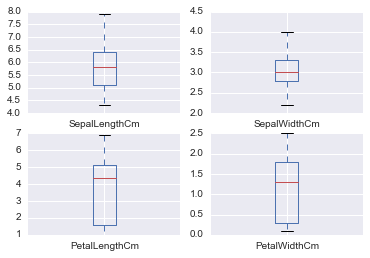

In [52]:
# Univariate plots
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001AD17748>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000001D5A60B8>]], dtype=object)

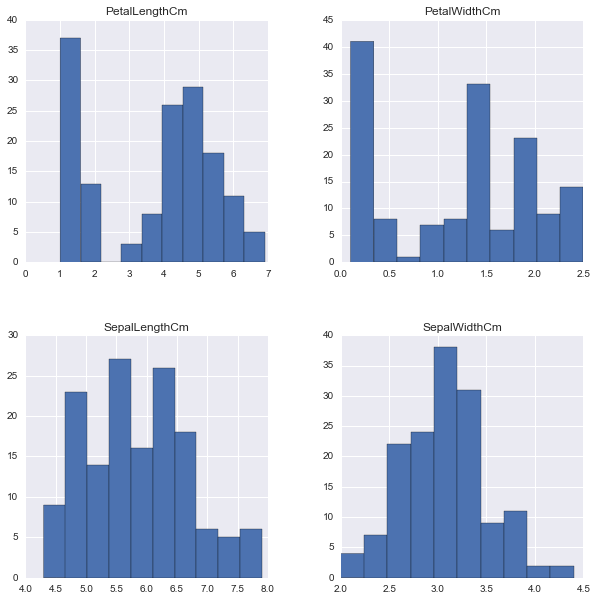

In [53]:
dataset.hist(figsize=(10,10))

# Multivariate Plots

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001D7F0550>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000001F311198>]], dtype=object)

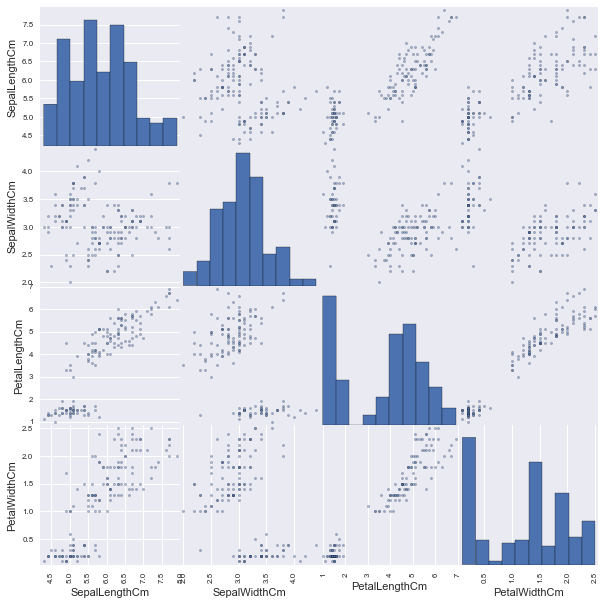

In [54]:
# Scatter plot matrix
scatter_matrix(dataset, figsize=(10,10))

# Evautate Some Algorithms
Now it is time to create some models of the data and estimate their accuracy on unseen dta.
Here is what we are going to cover in this step:
1. Separate out a validatiaon data set
2. Set-up the test harness to use 10-fold cross valdation
3. Build 5 different models to predict  species from flower measurements
4. Select the best model

## Create a Validataion Dataset

In [55]:
# Split-out validation dataset
array = dataset.values
X = array[:, 0:4]
y = array[:, 4]
validation_size = 0.20
seed = 7
X_train, X_validation, y_train, y_validation = model_selection.train_test_split(X,y, test_size=validation_size, random_state=seed)

## Test Harness for 10-fold cross validation

In [56]:
#num_folds =10 # version 0.18
#num_instances = len(X_train) # version 0.18
num_splits = 10  # version 0.18
seed = 7
scoring = 'accuracy'

## Build Models - 6 Algorithms

In [57]:
# Spot-Check algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = model_selection.KFold(n_splits= num_splits, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring = scoring)
    results.append(cv_results)
    names.append(name)
    print("%s %f (%f)" % (name, cv_results.mean(), cv_results.std()))
    


LR 0.966667 (0.040825)
LDA 0.975000 (0.038188)
KNN 0.983333 (0.033333)
CART 0.966667 (0.040825)
NB 0.975000 (0.053359)
SVM 0.991667 (0.025000)


## Select The Best Model
We can see that SVM followed by KNN has the largest estimated accuracy score. We can create a plot of the model evaluation results and compare the dpread and the mean accuracy of each model

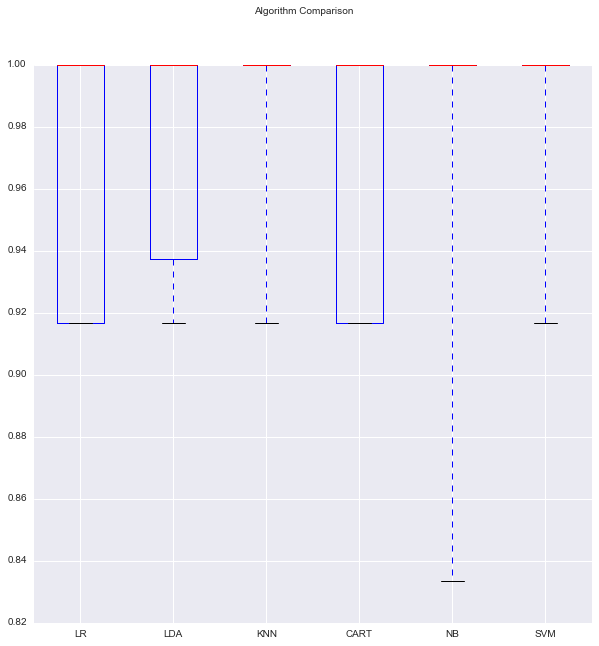

In [58]:
fig = plt.figure(figsize=(10,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)

In [63]:
results[5]

array([ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  0.91666667,  1.        ,  1.        ,  1.        ])

# Make Predictions

In [69]:
#Make predictions on the validation dataset
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(y_validation, predictions))
print(confusion_matrix(y_validation, predictions))
print(classification_report(y_validation, predictions))

0.9
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

    avg / total       0.90      0.90      0.90        30



In [71]:
# Make predictions on the validation datase
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_validation)
print(accuracy_score(y_validation, svm_pred))
print(confusion_matrix(y_validation, svm_pred))
print(classification_report(y_validation, svm_pred))

0.933333333333
[[ 7  0  0]
 [ 0 10  2]
 [ 0  0 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       1.00      0.83      0.91        12
 Iris-virginica       0.85      1.00      0.92        11

    avg / total       0.94      0.93      0.93        30

